## Bike Sharing EDA and Machine learning

## importing libaries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

file = pd.read_csv(r'bikeshare.csv')
file.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Data Analysis

In [44]:
file.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [45]:
file.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [46]:
file.isnull().values.any()

False

In [47]:
file.count()

datetime      10886
season        10886
holiday       10886
workingday    10886
weather       10886
temp          10886
atemp         10886
humidity      10886
windspeed     10886
casual        10886
registered    10886
count         10886
dtype: int64

### Data Visualization

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


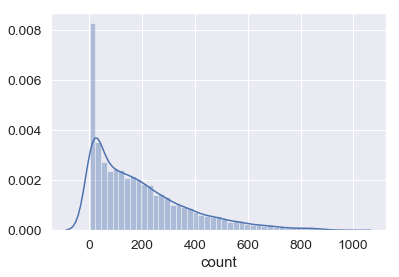

In [48]:
sns.distplot(file['count'])

In [49]:
print("Skewness:",file['count'].skew())
print("Kurtosis:",file['count'].kurt())

Skewness: 1.2420662117180776
Kurtosis: 1.3000929518398334


In [50]:
temp= pd.DatetimeIndex(file['datetime'])
file["dayofweek"] = temp.dayofweek
file["hour"] = temp.hour
file["month"] = temp.month
file['year']= temp.year
file = file.drop(['datetime'],axis=1)
file.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek,hour,month,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5,0,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,5,2,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,5,3,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,5,4,1,2011


In [51]:
file.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek,hour,month,year
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,3.013963,11.541613,6.521495,2011.501929
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,2.004585,6.915838,3.444373,0.500019
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2011.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,1.000000,6.000000,4.000000,2011.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,3.000000,12.000000,7.000000,2012.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,5.000000,18.000000,10.000000,2012.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,6.000000,23.000000,12.000000,2012.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


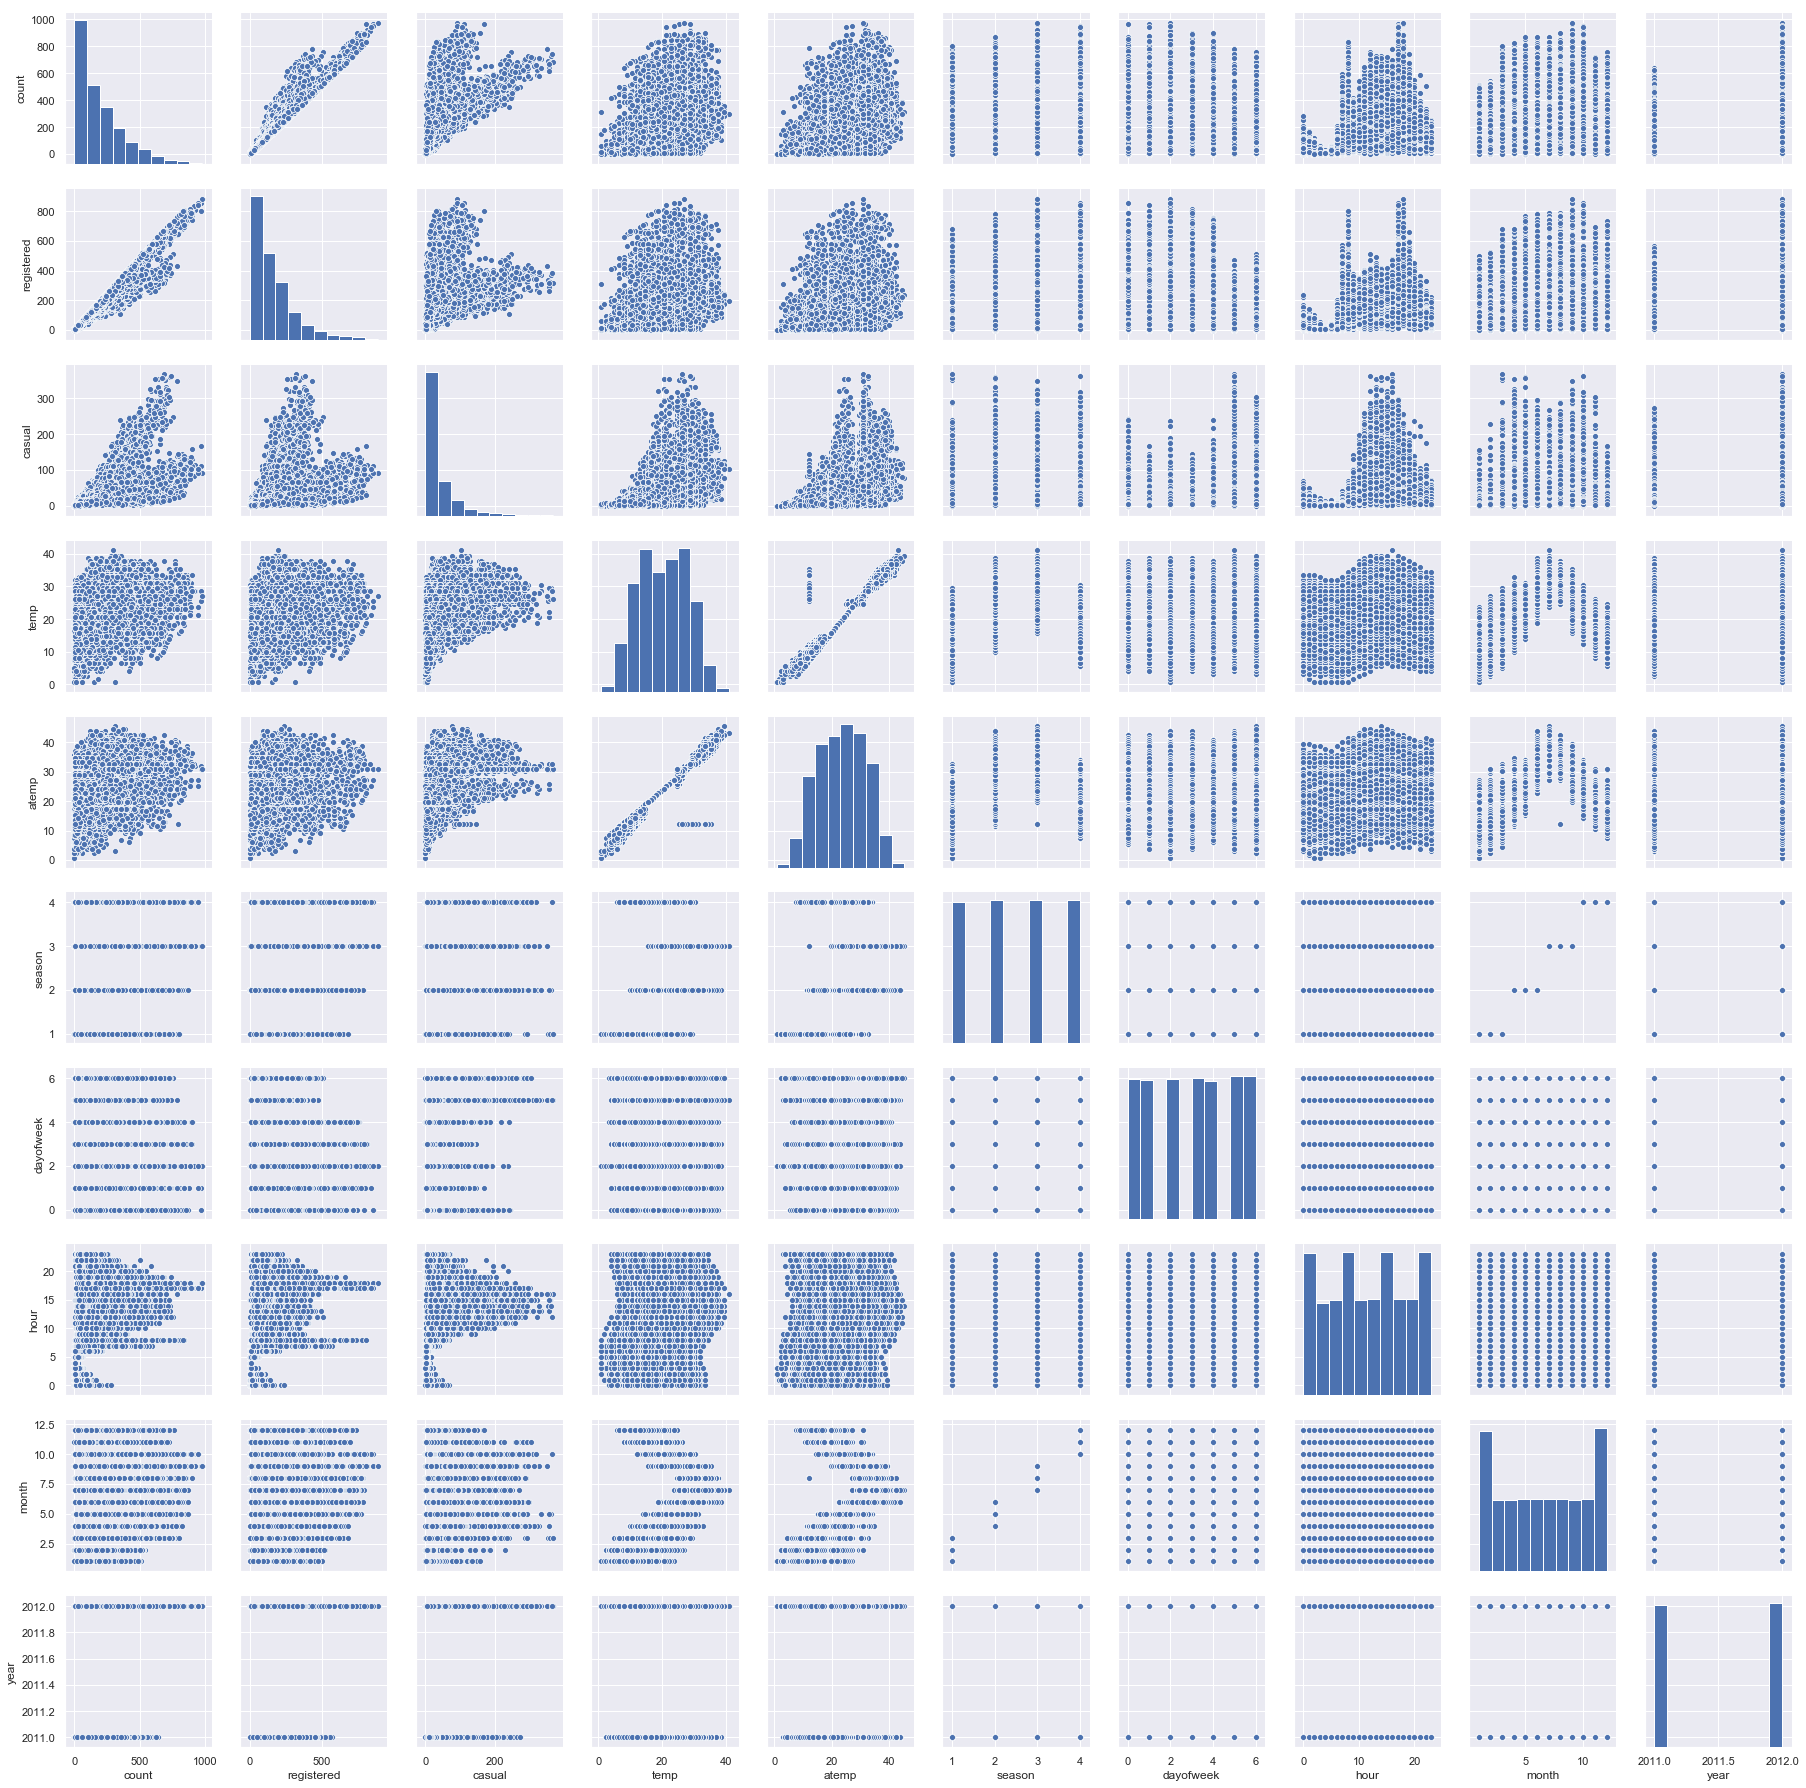

In [52]:
sns.set()
cols = ['count', 'registered', 'casual', 'temp', 'atemp', 'season','dayofweek','hour','month','year']
sns.pairplot(file[cols],size=2.5)
plt.show()

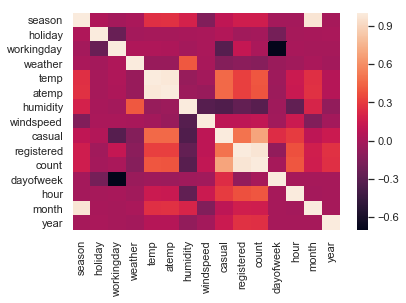

In [53]:
corrmat = file.corr()
sns.heatmap(corrmat)

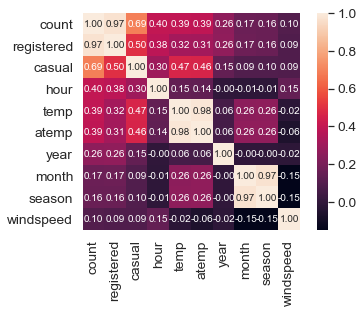

In [54]:
k =10
cols = corrmat.nlargest(k,'count')['count'].index
cm = np.corrcoef(file[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True,square=True,annot=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

### scatter plot registered/count

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


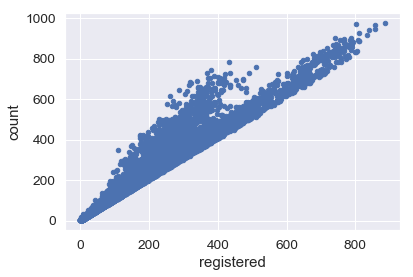

In [55]:


var ='registered'
data = pd.concat([file['count'],file[var]],axis=1)
data.plot.scatter(x=var,y='count')

### scatter plot casual/count

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


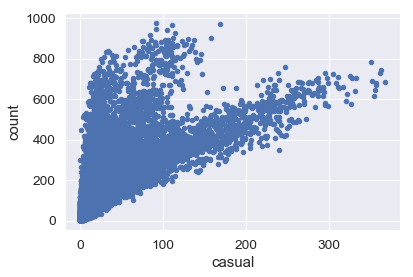

In [56]:


var ='casual'
data = pd.concat([file['count'],file[var]],axis=1)
data.plot.scatter(x=var,y='count')

### box plot season/count

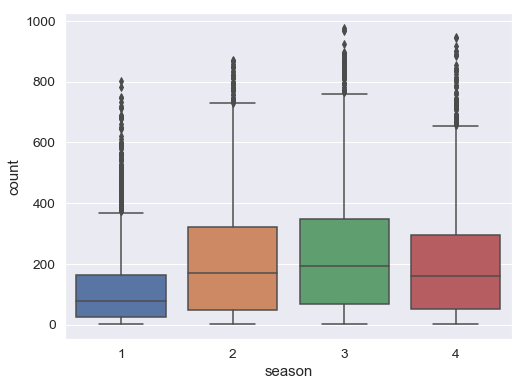

In [57]:


var ='season'
data =pd.concat([file['count'],file[var]],axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='season',y='count',data=data)

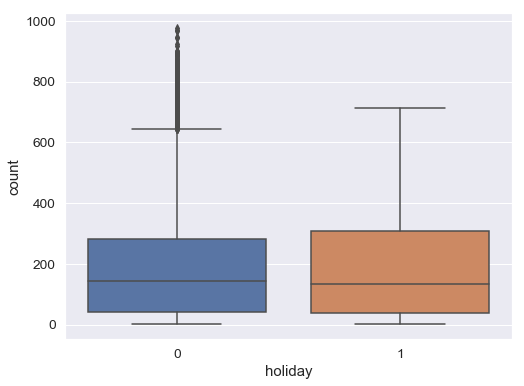

In [58]:
#box plot holiday/count

var ='holiday'
data =pd.concat([file['count'],file[var]],axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y='count',data=data)

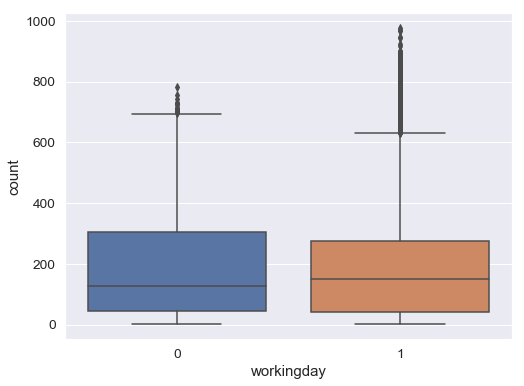

In [59]:
#box plot workingday/count

var ='workingday'
data =pd.concat([file['count'],file[var]],axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y='count',data=data)

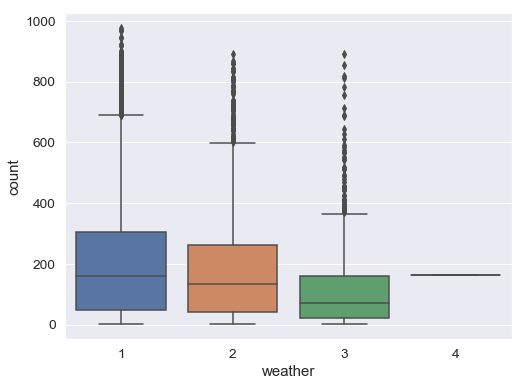

In [60]:
#box plot weather/count

var ='weather'
data =pd.concat([file['count'],file[var]],axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y='count',data=data)

### histogram and normal probability plot

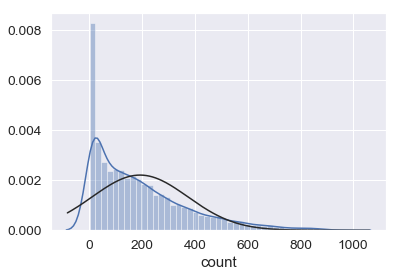

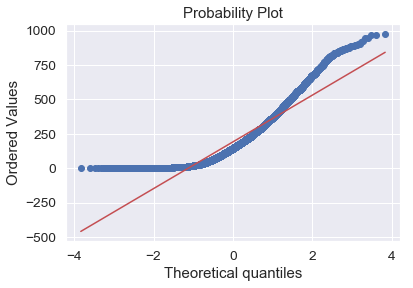

In [61]:

from scipy.stats import norm
from scipy import stats


sns.distplot(file['count'], fit=norm);
fig = plt.figure()
res = stats.probplot(file['count'], plot=plt)

In [62]:
file['count'] = np.log(file['count'])

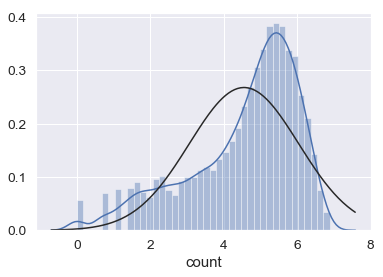

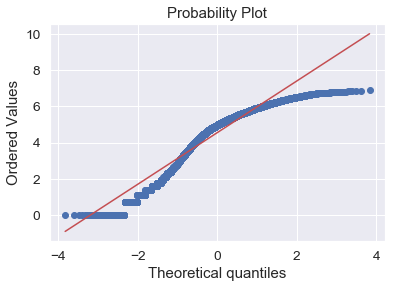

In [63]:
sns.distplot(file['count'], fit=norm);
fig = plt.figure()
res = stats.probplot(file['count'], plot=plt)

In [64]:
from sklearn.preprocessing import StandardScaler
count_scaled = StandardScaler().fit_transform(file['count'][:,np.newaxis])
lowrange = count_scaled[count_scaled[:,0].argsort()][:10]
highrange = count_scaled[count_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(lowrange)
print('\nouter range (high) of the distribution:')
print(highrange)

outer range (low) of the distribution:
[[-3.05751461]
 [-3.05751461]
 [-3.05751461]
 [-3.05751461]
 [-3.05751461]
 [-3.05751461]
 [-3.05751461]
 [-3.05751461]
 [-3.05751461]
 [-3.05751461]]

outer range (high) of the distribution:
[[1.50875308]
 [1.5109955 ]
 [1.51174131]
 [1.52356301]
 [1.52939674]
 [1.54234024]
 [1.54589182]
 [1.55991328]
 [1.56129946]
 [1.56612867]]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


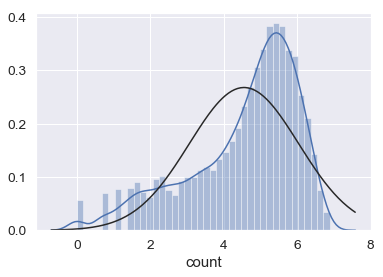

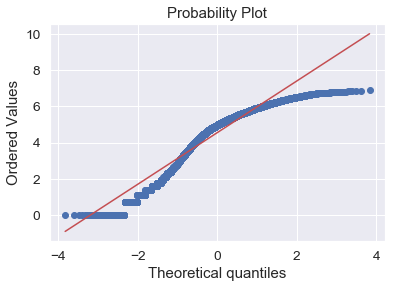

In [65]:
sns.distplot(file['count'], fit=norm);
fig = plt.figure()
res = stats.probplot(file['count'], plot=plt)

In [66]:
y = file['count']
file = file.drop(['count','casual','registered'],axis=1)
file.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dayofweek,hour,month,year
0,1,0,0,1,9.84,14.395,81,0.0,5,0,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,5,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,2,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,5,3,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,5,4,1,2011


## Model training and spliting

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(file,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7620, 12)
(3266, 12)
(7620,)
(3266,)


### Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, r2_score, mean_absolute_error,mean_squared_error

clf = LinearRegression()
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
print("R2 Score:",r2_score(y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
print("Mean Squared Error:",mean_squared_error(y_test,prediction))

R2 Score: 0.4720367438008358
Mean Absolute Error: 0.8419364257602598
Mean Squared Error: 1.1541990197920442


## DecisionTree Regressor

In [69]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(random_state=0)
training = clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
print("R2 Score:",r2_score(y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
print("Mean Squared Error:",mean_squared_error(y_test,prediction))

R2 Score: 0.8952126267324105
Mean Absolute Error: 0.30603895967055134
Mean Squared Error: 0.2290793574968225


### Gradient Boosting Regressor

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor()
training = clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
print("R2 Score:",r2_score(y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
print("Mean Squared Error:",mean_squared_error(y_test,prediction))

R2 Score: 0.9193969748715879
Mean Absolute Error: 0.3015574160260479
Mean Squared Error: 0.17620910452221367


## XGBRegressor

In [71]:
from xgboost import XGBRegressor
clf = XGBRegressor()
training = clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
print("R2 Score:",r2_score(y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
print("Mean Squared Error:",mean_squared_error(y_test,prediction))

[00:54:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


R2 Score: 0.9228660482175174
Mean Absolute Error: 0.29325367462662405
Mean Squared Error: 0.1686252414248392


## AdaBoostRegressor

In [72]:
from sklearn.ensemble import AdaBoostRegressor

clf = AdaBoostRegressor(DecisionTreeRegressor(random_state=42))
training = clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
print("R2 Score:",r2_score(y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
print("Mean Squared Error:",mean_squared_error(y_test,prediction))

R2 Score: 0.942751001355611
Mean Absolute Error: 0.22230957519884653
Mean Squared Error: 0.12515404688409557
